In [44]:
import pandas as pd
from credit_decision_tree import DecisionTree
import numpy as np

In [4]:
train_no_zeros = pd.read_pickle("model_evaluation/train.pkl")
train_no_zeros.drop(train_no_zeros[train_no_zeros["STATUS"] == 0].index, inplace=True)
train_no_zeros

,Unnamed: 0,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
724670,724670,5143180,-1,1,M,Y,N,0,225000.0,Commercial associate,...,Single / not married,House / apartment,-17473,-2631,1,0,0,0,Managers,1.0
587357,587357,5115801,-23,-1,F,N,Y,0,202500.0,Working,...,Single / not married,House / apartment,-10752,-590,1,1,0,0,NaN,1.0
587361,587361,5115801,-27,-1,F,N,Y,0,202500.0,Working,...,Single / not married,House / apartment,-10752,-590,1,1,0,0,NaN,1.0
587393,587393,5115803,-43,-1,F,N,Y,0,202500.0,Working,...,Single / not married,House / apartment,-10752,-590,1,1,0,0,NaN,1.0
587432,587432,5115805,-38,-1,F,N,Y,0,202500.0,Working,...,Single / not married,House / apartment,-10752,-590,1,1,0,0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523726,523726,5105054,-4,-1,F,N,Y,19,112500.0,Working,...,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0
523724,523724,5105054,-2,-1,F,N,Y,19,112500.0,Working,...,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0
523725,523725,5105054,-3,-1,F,N,Y,19,112500.0,Working,...,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0
523727,523727,5105054,-5,-1,F,N,Y,19,112500.0,Working,...,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0


In [6]:
test_no_zeros = pd.read_pickle("model_evaluation/test.pkl")
test_no_zeros.drop(test_no_zeros[test_no_zeros["STATUS"] == 0].index, inplace=True)
test_no_zeros

,Unnamed: 0,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
513210,513210,5100075,-36,1,F,Y,Y,0,112500.0,Pensioner,...,Married,House / apartment,-21797,365243,1,0,0,0,NaN,2.0
532723,532723,5105565,-54,-1,M,N,Y,0,135000.0,Pensioner,...,Civil marriage,House / apartment,-23094,365243,1,0,1,0,NaN,2.0
486463,486463,5095815,-43,1,F,N,N,3,112500.0,Working,...,Married,Municipal apartment,-15447,-2470,1,1,0,0,Sales staff,5.0
291376,291376,5061068,-5,-1,M,Y,N,0,256500.0,Pensioner,...,Married,House / apartment,-21913,365243,1,0,1,0,NaN,2.0
314380,314380,5062123,-1,-1,F,N,Y,0,157500.0,Commercial associate,...,Separated,With parents,-19523,-259,1,0,0,0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594777,594777,5116236,-12,1,M,N,Y,0,126000.0,Commercial associate,...,Married,House / apartment,-15972,-1051,1,0,0,0,High skill tech staff,2.0
594681,594681,5116226,-34,1,M,Y,Y,0,238500.0,Pensioner,...,Married,Office apartment,-25152,365243,1,0,0,0,NaN,2.0
170764,170764,5038688,-26,-1,F,Y,N,0,240750.0,State servant,...,Civil marriage,With parents,-17693,-7778,1,0,0,0,Laborers,2.0
762655,762655,5149393,-1,1,F,N,N,1,135000.0,Commercial associate,...,Married,With parents,-13689,-1172,1,0,0,0,Sales staff,3.0


In [9]:
train_status_counts = train_no_zeros["STATUS"].value_counts()
test_status_counts = test_no_zeros["STATUS"].value_counts()
train_status_counts, test_status_counts

( 1    247116
 -1    218166
 -2      6581
 -6      1129
 -3       613
 -4       203
 -5       152
 Name: STATUS, dtype: int64,
  1    82420
 -1    72488
 -2     2166
 -6      398
 -3      188
 -4       83
 -5       62
 Name: STATUS, dtype: int64)

In [13]:
predictors = [
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    "FLAG_MOBIL",
    "FLAG_WORK_PHONE",
    "FLAG_PHONE",
    "FLAG_EMAIL",
    "OCCUPATION_TYPE",
    "CNT_FAM_MEMBERS"
]

import time

start = time.time()
cred_tree_no_zeros = DecisionTree(train_status_counts[-6], 0.8).fit(predictors, target="STATUS", data=train_no_zeros)
training_time = time.time() - start

print("\n", f"time to train: {training_time}", f"num nodes: {len(cred_tree_no_zeros.leaf_nodes_)}", sep="\n")

 448
= 4 0.6388888888888888 216
= 5 0.6934046345811051 1122
= 6 0.5477707006369427 628
= 7 0.6845564074479737 913
= 8 0.5555555555555556 468
= 9 0.7796208530805687 422
= 10 0.5457627118644067 295
= 11 0.624 1000
= 12 0.8343434343434344 495
= 13 0.6297520661157024 605
= 14 0.6362339514978602 701
= 15 0.5093457943925234 1070
= 16 0.7253086419753086 648
= 17 0.5012285012285013 407
= 18 0.6227154046997389 766
= 19 0.7901861252115059 591
= 20 0.5536363636363636 1100
= 21 0.7574931880108992 367
= 22 0.5895196506550219 229
= 23 0.6520376175548589 638
= 24 0.5219123505976095 502
= 25 0.7079136690647482 695
= 26 0.6907216494845361 873
= 27 0.5171149144254279 818
= 28 0.697265625 512
= 29 0.5836298932384342 1124
= 30 0.49566294919454773 807
= 31 0.7704590818363274 501
= 32 0.7727891156462585 735
= 33 0.5607142857142857 560
= 34 0.6698630136986301 730
= 35 0.953125 192
= 36 0.6180758017492711 1029
= 37 0.5433422698838248 1119
= 38 0.612565445026178 573
= 39 0.7619047619047619 294
= 40 0.581932773

In [14]:
for i, leaf_node_df in enumerate(cred_tree_no_zeros.leaf_nodes_):
    leaf_node_df.to_pickle(f"leaf_nodes_no_zeros_pkls/zeroless_node_{i}.pkl")

In [15]:
by_ID = test_no_zeros.groupby("ID")
test_by_ID = pd.DataFrame([
    group.iloc[0, :]
    for name, group in by_ID
])
test_by_ID

,Unnamed: 0,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
6,6,5008804,-6,1,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
20,20,5008805,-4,1,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
59,59,5008806,-28,-1,M,Y,Y,0,112500.0,Working,...,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
63,63,5008808,-2,-1,F,N,Y,0,270000.0,Commercial associate,...,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
85,85,5008810,-14,1,F,N,Y,0,270000.0,Commercial associate,...,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777577,777577,5150480,-36,1,F,Y,Y,1,157500.0,Working,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
777640,777640,5150482,-17,-1,F,Y,Y,1,157500.0,Working,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
777681,777681,5150484,-11,-1,F,Y,Y,1,157500.0,Working,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
777683,777683,5150485,0,-1,F,Y,Y,1,157500.0,Working,...,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0


In [16]:
test_by_ID.set_index("ID", inplace=True)
test_by_ID

,Unnamed: 0,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,,,,
5008804,6,-6,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008805,20,-4,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008806,59,-28,-1,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,63,-2,-1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008810,85,-14,1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150480,777577,-36,1,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
5150482,777640,-17,-1,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0
5150484,777681,-11,-1,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.0


In [27]:
test_by_ID.to_pickle("model_evaluation/test_by_ID.pkl")

In [17]:
cluster_preds = cred_tree_no_zeros.predict(test_by_ID)
cluster_preds

,0
ID,
5008804,293
5008805,293
5008806,400
5008808,129
5008810,129
...,...
5150480,252
5150482,252
5150484,252


In [24]:
cluster_preds.to_pickle("model_evaluation/cluster_preds_no_zeros.pkl")

In [25]:
import dill

with open("model_evaluation/cred_tree_no_zeros.pkl", "wb") as pklfile:
    dill.dump(cred_tree_no_zeros, pklfile)
with open("model_evaluation/cred_tree_no_zeros.pkl", "rb") as pklfile:
    tree_from_pkl = dill.load(pklfile)

In [26]:
tree_from_pkl.predict(test_by_ID).equals(cluster_preds)

True

In [28]:

def calculate_pmf(df):
    pmf = pd.Series(0, index=[-6,-5,-4,-3,-2,-1,1])
    counts = df["STATUS"].value_counts()
    pmf[counts.index] = counts / df.shape[0]
    return pmf

pred_pmfs = pd.DataFrame(
    [
        calculate_pmf(cred_tree_no_zeros.leaf_nodes_[clust])
        for clust in cluster_preds.loc[:, 0]
    ],
    index=cluster_preds.index
)
actual_pmfs = by_ID.apply(calculate_pmf)

In [29]:
pred_pmfs.shape, actual_pmfs.shape

((29507, 7), (29507, 7))

In [30]:
pred_pmfs.to_pickle("model_evaluation/pred_pmfs_no_zeros.pkl")
actual_pmfs.to_pickle("model_evaluation/actual_pmfs_no_zeros.pkl")

In [31]:
pred_pmfs.index.equals(actual_pmfs.index)

True

In [53]:
model_mae = (pred_pmfs - actual_pmfs).abs().mean(axis=0)
model_mae

-6    0.004000
-5    0.000702
-4    0.000903
-3    0.002449
-2    0.028201
-1    0.338401
 1    0.338755
dtype: float64

In [54]:
nullhypo_preds = train_no_zeros["STATUS"].value_counts() / train_no_zeros.shape[0]
nullhypo_mae = (nullhypo_preds - actual_pmfs).abs().mean(axis=0)
nullhypo_mae

-6    0.004271
-5    0.000715
-4    0.000914
-3    0.002463
-2    0.028438
-1    0.379760
 1    0.382791
dtype: float64

In [55]:
# relative mean absolute error of model compared to null hypothesis
model_mae / nullhypo_mae

-6    0.936600
-5    0.981801
-4    0.987393
-3    0.994611
-2    0.991687
-1    0.891091
 1    0.884961
dtype: float64

In [56]:
model_msqe = np.sqrt(((pred_pmfs - actual_pmfs)**2).mean())
model_msqe

-6    0.033842
-5    0.011561
-4    0.012922
-3    0.021262
-2    0.086809
-1    0.391223
 1    0.389607
dtype: float64

In [57]:
nullhypo_msqe = np.sqrt(((nullhypo_preds - actual_pmfs)**2).mean())
nullhypo_msqe

-6    0.034170
-5    0.011550
-4    0.012921
-3    0.021275
-2    0.087691
-1    0.419353
 1    0.419362
dtype: float64

In [58]:
# relative error comparing msqe
model_msqe / nullhypo_msqe

-6    0.990401
-5    1.000950
-4    1.000069
-3    0.999394
-2    0.989941
-1    0.932920
 1    0.929047
dtype: float64

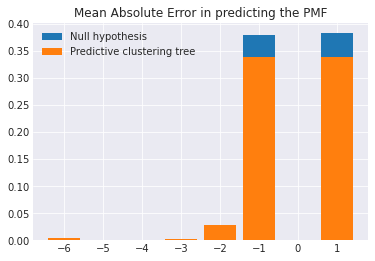

In [59]:
import matplotlib.pyplot as plt
with plt.style.context("seaborn-darkgrid"):
    plt.title("Mean Absolute Error in predicting the PMF")
    plt.bar(nullhypo_mae.index, nullhypo_mae.values, label="Null hypothesis")
    plt.bar(model_mae.index, model_mae.values, label="Predictive clustering tree")
    plt.legend()

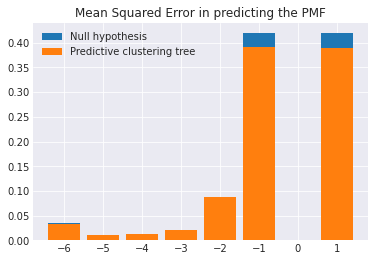

In [60]:
with plt.style.context("seaborn-darkgrid"):
    plt.title("Mean Squared Error in predicting the PMF")
    plt.bar(nullhypo_msqe.index, nullhypo_msqe.values, label="Null hypothesis")
    plt.bar(model_msqe.index, model_msqe.values, label="Predictive clustering tree")
    plt.legend()

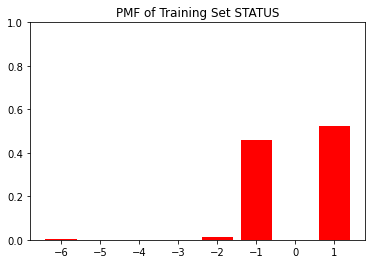

In [61]:
priors = train_no_zeros.STATUS.value_counts()/train_no_zeros.shape[0]
priors.sort_index(inplace=True)
plt.bar(priors.index, priors.values, color="red")
plt.ylim((0,1))
plt.title("PMF of Training Set STATUS")
plt.savefig("zeroless_leaf_node_plots/full_training_set")

In [64]:
train_no_zeros.to_pickle("data/train_no_zeros.pkl")
test_by_ID.to_pickle("data/test_by_ID_no_zeros.pkl")